In [25]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [3]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df.skew(numeric_only=True)

math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64

In [7]:
df.isnull().any().sum()

0

In [8]:
df.shape

(1000, 8)

In [9]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [14]:
np.random.seed(42)
cols = df.select_dtypes(include = ['number'])

for col in cols:
    idx = np.random.choice(df.index, size = np.random.randint(50,71), replace=True)
    df.loc[idx, col] = np.nan

df.isnull().sum()

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     55
reading score                  51
writing score                  62
dtype: int64

In [16]:
for col in cols:
    df[col] = df[col].fillna(df[col].median())
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [17]:
df.skew(numeric_only=True)

math score      -0.272206
reading score   -0.283226
writing score   -0.316742
dtype: float64

In [19]:
df.rename(columns={'race/ethnicity':'race'})

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,70.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,70.0,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0


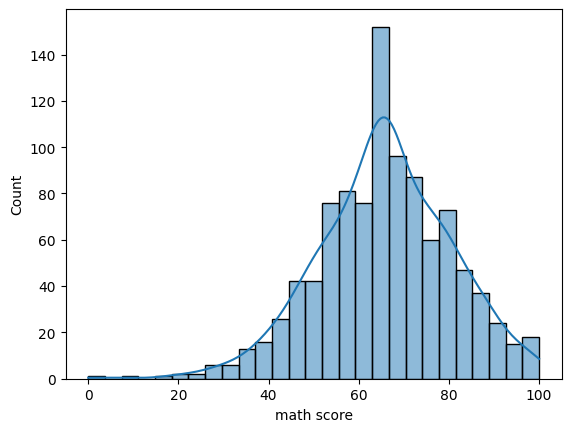

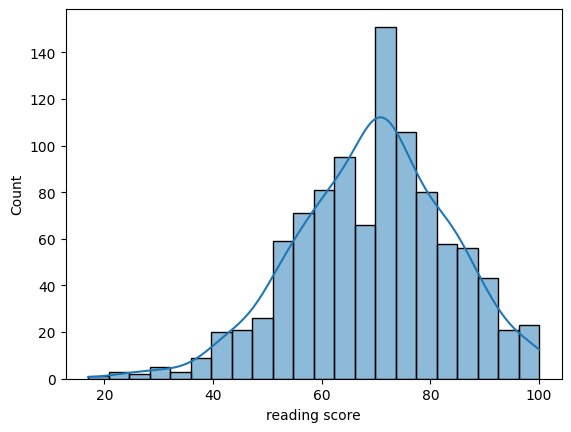

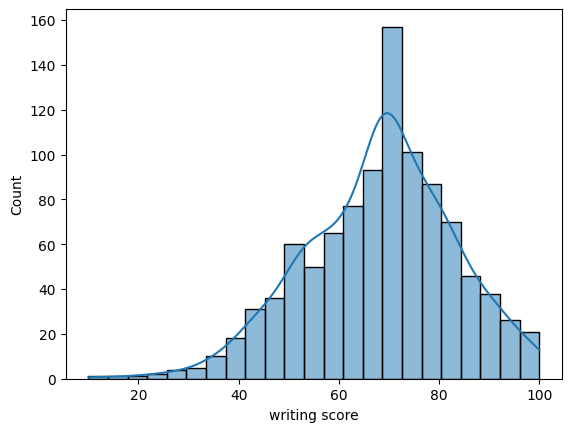

In [35]:
sns.histplot(data = df, x='math score', kde=True)
plt.show()
sns.histplot(data = df, x='reading score', kde=True)
plt.show()
sns.histplot(data = df, x='writing score', kde=True)
plt.show()

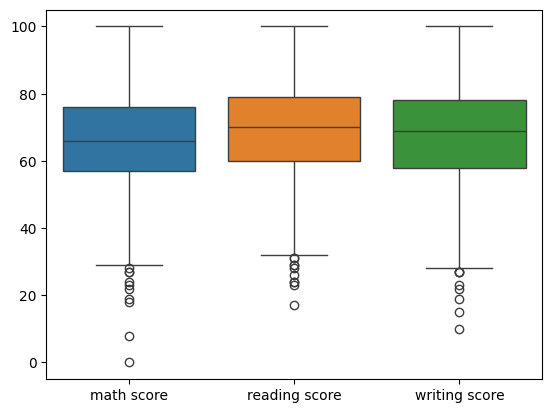

In [33]:
cols = ['math score', 'reading score', 'writing score']
sns.boxplot(df[cols])
plt.show()

In [36]:
Q1 = df['math score'].quantile(0.25)
Q3 =  df['math score'].quantile(0.75)
IQR = Q3 - Q1

lowerbound = Q1 - 1.5*IQR
upperbound = Q3 + 1.5*IQR

outliers = df[(df['math score'] < lowerbound) | (df['math score'] > upperbound)]
# Count the number of outliers
num_outliers = outliers.shape[0]
# Display the number of outliers
print(f"Number of outliers: {num_outliers}")


Number of outliers: 10


In [40]:
df = df[(df['math score'] >= lowerbound) & (df['math score'] <= upperbound)]

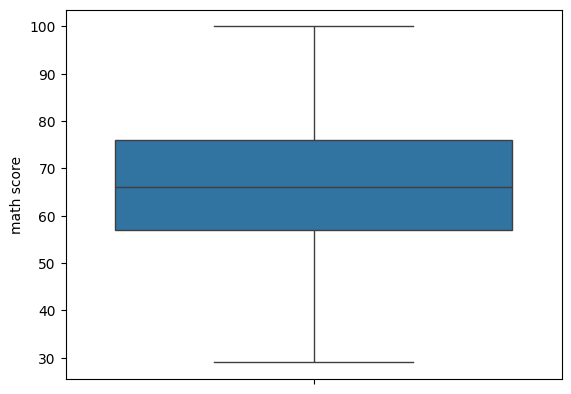

In [38]:
sns.boxplot(df['math score'])
plt.show()

In [41]:
df['math score'].skew()

-0.019228774638328647

In [44]:
Q1 = df['reading score'].quantile(0.25)
Q3 = df['reading score'].quantile(0.75)
IQR = Q3 - Q1

lowerbound = Q1 - 1.5*IQR
upperbound = Q3 + 1.5*IQR

outliers = df[(df['reading score'] < lowerbound) | (df['reading score'] > upperbound)]
print("Number of outliers: ", outliers.shape[0])

df = df[(df['reading score'] >= lowerbound) & (df['reading score'] <= upperbound)]

Number of outliers:  7


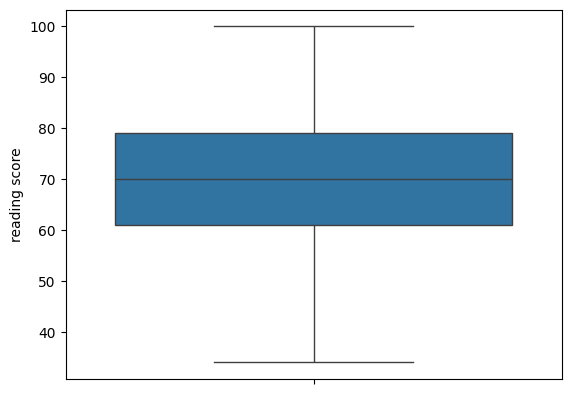

In [45]:
sns.boxplot(df['reading score'])
plt.show()

In [46]:
df['reading score'].skew()

-0.04609224317744325

In [51]:
from scipy.stats import zscore
df['z_score'] = zscore(df['writing score'])
outliers = df[(df['writing score'] > 3) | (df['writing score'] < -3)]
print("Number of outliers: ", outliers.shape[0])

Number of outliers:  983


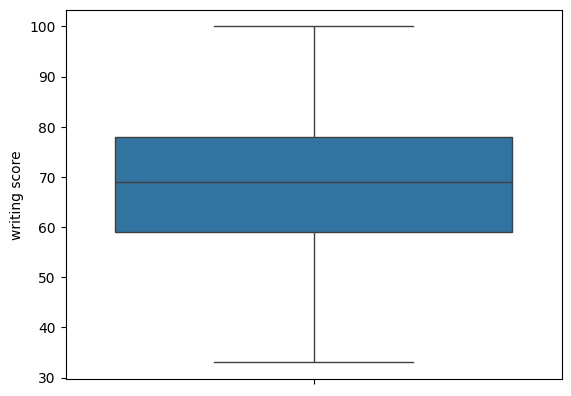

In [50]:
sns.boxplot(df['writing score'])
plt.show()

In [52]:
df['writing score'].skew()

-0.07249190586266743

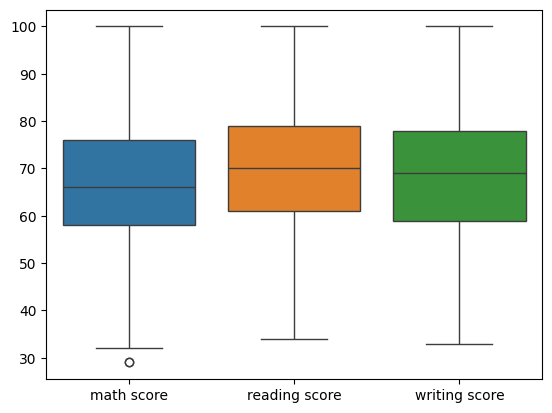

In [56]:
sns.boxplot(df[cols])
plt.show()

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['writing score']])

mean_sc = df_scaled.mean(axis=0)
std_sc = df_scaled.std(axis=0)
print(f"Mean values after standardization:\n{mean_sc}")
print(f"Standard deviation values after standardization:\n{std_sc}")

Mean values after standardization:
[-1.40952018e-16]
Standard deviation values after standardization:
[1.]
